In [1]:
import ANN
import numpy as np
import copy
from pprint import pprint
from collections import defaultdict as ddict

In [2]:
numNeurons = 100

In [3]:
class hopfieldNetwork:
    ''' This creates a Hopfield network class '''
    def __init__(self, Input):
        self.Input = Input
        self.InputComplement = -1 * Input
        self.numNeurons = self.Input.shape[1]
        self.neuronList = [hopfieldNeuron(1,i) for i in range(self.numNeurons)]
        self.mapInputToNeurons(self.Input)
        self.connections = ddict(list)
        self.connect_neurons()
        self.compute()
        
    
    def mapInputToNeurons(self, Input):
        ''' Mapping of the inputs to different subsets of neurons'''
        for index, neuron in enumerate(self.neuronList):
            neuron.input = Input[:,index]
        
    def connect_neurons(self):
        for i, neuron in enumerate(self.neuronList):
            for j, neuron_2 in enumerate(self.neuronList, i+1):
                self.connections[neuron].append((neuron_2, int(neuron.input*neuron_2.input)))
                self.connections[neuron_2].append((neuron, int(neuron.input*neuron_2.input)))
    
    def compute(self, mode ='async'):
        if mode == 'sync':
            new_output = []
            for neuron in self.connections:
                for neuron_in, weight in self.connections[neuron]:
                    neuron.localField += weight*neuron_in.input
                neuron.output = neuron.activation(neuron.localField)
                new_output.append(neuron.output)
                neuron.localField = 0
            
            new_output = np.array([new_output])
            self.mapInputToNeurons(new_output)
            
                
        elif mode == 'async':
            for neuron in self.connections:
                for neuron_in, weight in self.connections[neuron]:
                    neuron.localField += weight*neuron_in.input
                neuron.output = neuron.activation(neuron.localField)
                neuron.localField = 0
                neuron.input = neuron.output
            
            new_output = np.array([[i.output for i in self.neuronList]])
            
        return new_output
    
    def runHopfieldNetwork(self, test, count=25):
        hop.mapInputToNeurons(test)
        curr_state = test
        states = [curr_state]
        
        while not ((curr_state == self.Input).all() or
                   (curr_state == self.InputComplement).all() or
                  count == 0):            
            curr_state = self.compute()
            states.append(curr_state)
            count -= 1
            
        return states
                
class hopfieldNeuron(ANN.neuron):
    def __init__(self, layer, index, activation_method='step'):
        self.input = []
        self.localField = 0
        self.activation_method= activation_method

In [4]:
a = np.array([[-1,1,1,1,-1,1,-1,1]])

In [5]:
hop = hopfieldNetwork(a)

In [6]:
pprint(hop.runHopfieldNetwork(np.array([[-1,-1,1,1,1,1,1,1]])))

[array([[-1, -1,  1,  1,  1,  1,  1,  1]]),
 array([[-1,  1,  1,  1, -1,  1, -1,  1]])]


## Let's memorize some digits!

In [7]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [8]:
#Load the digits dataset
digits = datasets.load_digits()

In [9]:
# Binarize the dataset
for digit_im, digit_data in zip(digits['images'], digits['data']):
    digit_im[digit_im>0] = 1
    digit_data[digit_data>0] = 1
    digit_data[digit_data==0] = -1

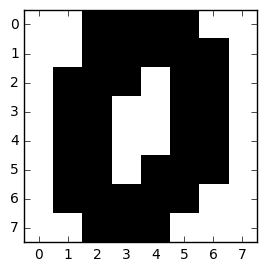

In [10]:
#Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [11]:
hop = hopfieldNetwork(np.matrix(digits.data[0]))

In [12]:
print(digits.data[0])

[-1. -1.  1.  1.  1.  1. -1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1.  1.
  1.  1. -1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1.
 -1.  1.  1. -1. -1.  1.  1. -1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.
 -1. -1. -1. -1.  1.  1.  1. -1. -1. -1.]


In [13]:
print([i.output for i in hop.neuronList])

[-1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1]


In [14]:
output = np.array([i.output for i in hop.neuronList])
image_out = output.reshape((8,8))

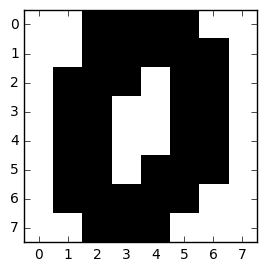

In [15]:
#Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(image_out, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [16]:
output[3:6] = -1
image_out = output.reshape((8,8))

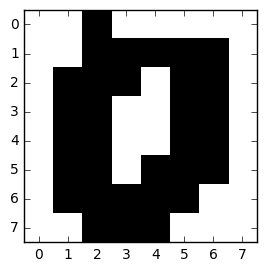

In [17]:
#Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(image_out, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [18]:
hop.mapInputToNeurons(np.matrix(output))

In [19]:
hop.compute()

array([[-1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1,
         1,  1,  1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,
         1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,
         1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1]])

In [20]:
output = np.array([i.output for i in hop.neuronList])
image_out = output.reshape((8,8))

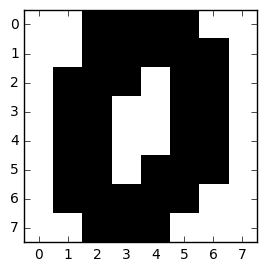

In [21]:
#Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(image_out, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [22]:
a * -1

array([[ 1, -1, -1, -1,  1, -1,  1, -1]])

## Let's Visualize the state changes

In [23]:
start_image = np.matrix(digits.data[0])
perturb_image = copy.deepcopy(digits.data[0])
perturb_image[0:32] = -1


hop = hopfieldNetwork(start_image)
states = hop.runHopfieldNetwork( np.matrix(perturb_image))
pprint(states)

image_out = states[0].reshape(8,8)

[matrix([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
         -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
         -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,
         -1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,
          1.,  1., -1., -1., -1., -1.,  1.,  1.,  1., -1., -1., -1.]]),
 array([[-1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1,
         1,  1,  1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,
         1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,
         1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1]])]


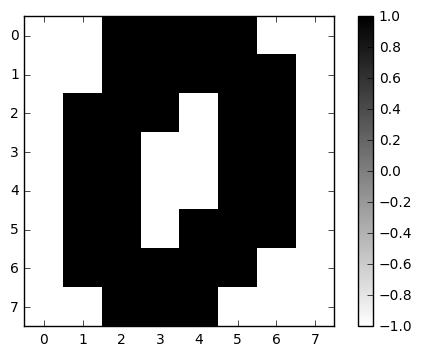

In [24]:
from IPython import display
plt.ion()

f, ax = plt.subplots(1,1)
im = ax.imshow(states[0].reshape(8,8), cmap=plt.cm.gray_r, interpolation = 'nearest')

f.colorbar(im)
f.canvas.draw()

for i in range(len(states)):  
    try:
        im.set_data(states[i].reshape(8,8)) 
        f.canvas.draw()
        display.display(f)
        display.clear_output(wait=True) 
        plt.pause(0.1)

    except KeyboardInterrupt:
        break
plt.ioff()
plt.close()

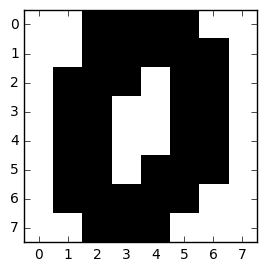

In [25]:
plt.ion()

f = plt.figure(1, figsize=(3, 3))
im = plt.imshow(start_image.reshape((8,8)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
